In [6]:
import image_segmentation as img_seg
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## Image Segmentation Project
WARNING: Do not attempt to segment large images. About 200x200 is a comfortable limit.

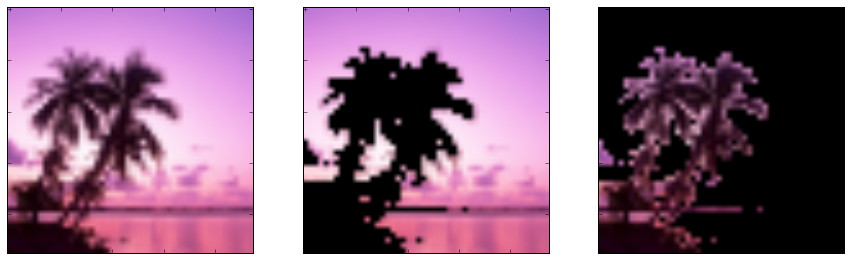

In [16]:
pic, pos, neg = img_seg.segment('dream.png')

fig,ax = plt.subplots(sharex=True,sharey=True)

fig.set_figwidth(15)
fig.set_figheight(10)

plt.subplot(131)
plt.imshow(pic)
plt.tick_params(labelbottom='off', labelleft='off')

plt.subplot(132)
plt.imshow(pos)
plt.tick_params(labelbottom='off', labelleft='off')

plt.subplot(133)
plt.imshow(neg)
plt.tick_params(labelbottom='off', labelleft='off')

plt.show()

## An Outline of the Method

The method of image segmentation applied here is given in a paper by Jianbo Shi and Jitendra
Malik in 2000 ([Shi2000])  

To outline this method, we start by representing the image as a graph where each pixel is connected to its nearest neigbors. Each edge of this graph has a weight that is calculated according to the equation below.  
  
$w_{ij} = \begin{cases} \exp(-\frac{|I(i) - I(j)|}{\sigma_I^2}-\frac{d(i,j)}{\sigma_d^2}) & \mbox{ for $d(i,j) < r$} \\ 0 & \mbox{ otherwise,} \end{cases}$  
$d(i,j)$ is the Euclidean distance between pixel $i$ and pixel $j$  
$|I(i) - I(j)|$ is the difference in brightness of pixels $i$ and $j$  
$r$, $\sigma_I$ and $\sigma_d$ are constants that we choose  

Most of the entries of this adjacency matrix are zero since any random pair of pixels are most likely not neighbors within distance of r, so a sparse matrix was perfect for this task. Now that we have our graph representation, we find the minimal cut by first calculating the Laplacian, $L$, and the degree, $D$. From Shi and Malik, we know that we must find the second smallest eigenvalue of the matrix $D^{-1/2}LD^{-1/2}$ (the smallest one is zero). This eigenvalue's corresponding eigenvector determines the cut that is optimal. This eigenvector is of length N*M, and every positive value indicates that its corresponding pixel in the picture is in the positive cut, and every negative value sends its corresponding pixel to the negative cut. Thus we have our optimal cut.

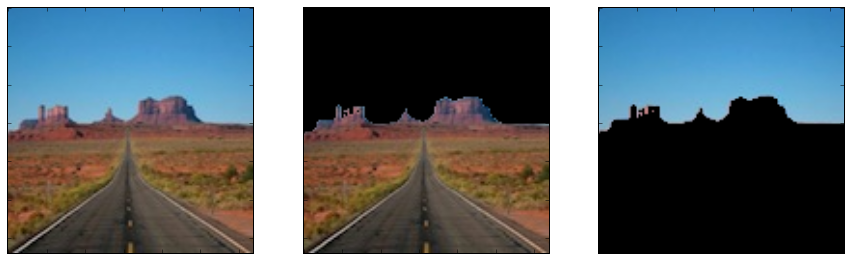

In [15]:
pic, pos, neg = img_seg.segment('RegMon.png')

fig,ax = plt.subplots(sharex=True,sharey=True)

fig.set_figwidth(15)
fig.set_figheight(10)

plt.subplot(131)
plt.imshow(pic)
plt.tick_params(labelbottom='off', labelleft='off')

plt.subplot(132)
plt.imshow(pos)
plt.tick_params(labelbottom='off', labelleft='off')

plt.subplot(133)
plt.imshow(neg)
plt.tick_params(labelbottom='off', labelleft='off')

plt.show()